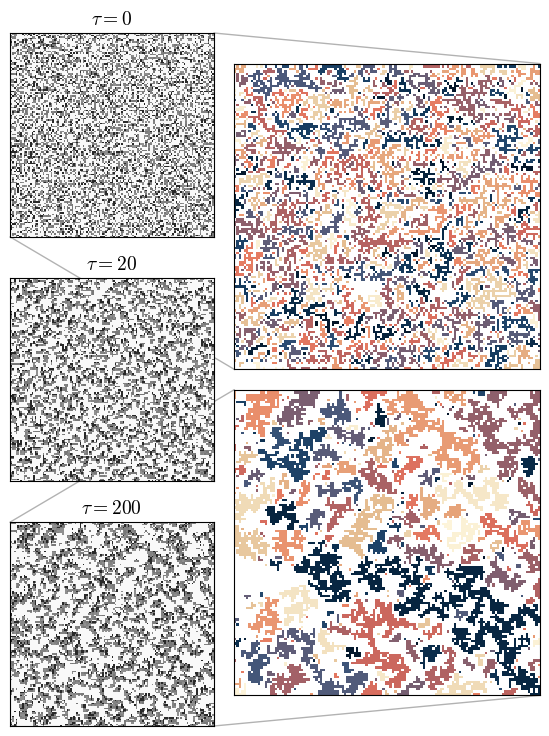

In [4]:
#| code-fold: true

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/project/persistent-exclusion-process")

import cmcrameri
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition, inset_axes

import src.lattice
from src.plot_utils import get_plot_configs

plot_configs = get_plot_configs()
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)

def plot_img(ax, img, tau):
    ax.set_xlim(0, n_x)
    ax.set_ylim(0, n_y)
    ax.set_aspect("equal", "box")
    ax.tick_params(
        axis = "both",
        which = "both",
        length = 0,
        labelleft = False,
        labelbottom = False,
    )
    ax.matshow(img, cmap=plt.get_cmap(name="cmc.grayCS", lut=5))
    ax.set_title(r"$\tau = {}$".format(tau))
    return ax

def plot_lb(img, ax):
    cmap=plt.get_cmap("cmc.lipariS")
    cl = cmap.__dict__['colors']
    new_cls = np.concatenate((cl,cl[1:],cl[1:],cl[1:]))
    cmap.__dict__["colors"] = new_cls
    cmap.__dict__["colors"][0] = np.array([1,1,1])
    cmap.__dict__["N"] = len(new_cls)
    kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
    lb, _ = ndimage.label(img, structure=kernel)
    ax.tick_params(
        axis = "both",
        which = "both",
        length = 0,
        labelleft = False,
        labelbottom = False,
    )
    ax.matshow(np.flipud(lb), cmap=cmap)
    return ax

n_x = n_y = 128
n_p = int(0.45 * n_x * n_y)
tumble = 0.023
speed = 1
lat = lattice.Lattice(n_x * n_y, n_p)
lat.set_square_connectivity(n_x, n_y)
lat.reset_random_occupancy()
lat.reset_orientations()
plt.rcParams["figure.autolayout"] = False

fig, (ax1, ax2, ax3) = plt.subplots(
    3,
    1,
    figsize=(4, 9),
)

for idx in range(201):
    if idx == 0:
        ima = lat.image()
        ax1 = plot_img(ax1, ima, idx)
    if idx == 20:
        ax2 = plot_img(ax2, lat.image(), idx)
    if idx == 200:
        imb = lat.image()
        ax3 = plot_img(ax3, imb, idx)
        break
    lat.c_move(tumble, speed)

kernel = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
lba, _ = ndimage.label(ima, structure=kernel)
lbb, _ = ndimage.label(imb, structure=kernel)

axi1 = inset_axes(ax1, width="100%", height="100%", borderpad=1)
axi1.set_axes_locator(InsetPosition(ax1, [1.1, -0.65, 1.5, 1.5]))
axi1 = plot_lb(ima, axi1)

axi3 = inset_axes(ax3, width="100%", height="100%", borderpad=1)
axi3.set_axes_locator(InsetPosition(ax3, [1.1, 0.15, 1.5, 1.5]))
axi3 = plot_lb(imb, axi3)

kwg = {"alpha":.3, "zorder":0, "color": "k"}

fig.add_artist(
    ConnectionPatch(
        xyA=(0, 0),
        coordsA=ax1.transAxes,
        xyB=(0, 0),
        coordsB=axi1.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(1, 1),
        coordsA=ax1.transAxes,
        xyB=(1, 1),
        coordsB=axi1.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(1, 0),
        coordsA=ax3.transAxes,
        xyB=(1, 0),
        coordsB=axi3.transAxes,
        **kwg
    )
)
fig.add_artist(
    ConnectionPatch(
        xyA=(0, 1),
        coordsA=ax3.transAxes,
        xyB=(0, 1),
        coordsB=axi3.transAxes,
        **kwg
    )
)
fig.savefig("plots/evo.pdf", bbox_inches='tight')